# Data Loading

In [ ]:
import pandas as pd
import numpy as np
import random

# Set seeds
np.random.seed(42)
random.seed(42)

df = pd.read_excel('DIB dataset and codebook.xlsx')

# Class Conversion
## (Add all the target columns and save the values in another column)
## (Convert those values between 0 and 1)
## (If <= 0.5, assign 0, otherwise assign 1)
## This will be our target column

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your dataframe and it already contains the OS columns

# Step 1: Add all the OS columns
df['Occupational_Stress_Sum'] = df[['OS1', 'OS2', 'OS3', 'OS4', 'OS5', 'OS6', 'OS7', 'OS8',
                                    'OS9', 'OS10', 'OS11', 'OS12', 'OS13', 'OS14',
                                    'OS15', 'OS16', 'OS17', 'OS18', 'OS19',
                                    'OS20', 'OS21', 'OS22', 'OS23',
                                    'OS24', 'OS25', 'OS26', 'OS27', 'OS28',
                                    'OS29', 'OS30', 'OS31',
                                    'OS32', 'OS33', 'OS34', 'OS35',
                                    'OS36', 'OS37', 'OS38', 'OS39',
                                    'OS40', 'OS41']].sum(axis=1)

# Step 2: Normalize the summed values between 0 and 1
scaler = MinMaxScaler()
df['Occupational_Stress_Normalized'] = scaler.fit_transform(df[['Occupational_Stress_Sum']])

# Step 3: Assign 0 or 1 based on the condition
df['Occupational_Stress_Target'] = df['Occupational_Stress_Normalized'].apply(lambda x: 0 if x <= 0.5 else 1)

# Optional: You might want to drop the intermediate columns if they are not needed
# df = df.drop(columns=['Occupational_Stress_Sum', 'Occupational_Stress_Normalized'])



In [ ]:
df.drop(columns=['OS1', 'OS2', 'OS3', 'OS4', 'OS5', 'OS6', 'OS7', 'OS8', 'OS9', 'OS10', 'OS11', 'OS12', 'OS13', 'OS14', 'OS15', 'OS16', 'OS17', 'OS18', 'OS19', 'OS20', 'OS21', 'OS22', 'OS23', 'OS24', 'OS25', 'OS26', 'OS27', 'OS28', 'OS29', 'OS30', 'OS31', 'OS32', 'OS33', 'OS34', 'OS35', 'OS36', 'OS37', 'OS38', 'OS39', 'OS40', 'OS41'], inplace=True)
df = df.drop(columns=['Occupational_Stress_Sum', 'Occupational_Stress_Normalized'])

In [ ]:
df.head()

,Age,Religion,Ethnicity,Marital status,Marriage period,No. of children,Educational level,Employment status,Working period,Household income,...,JS34,JS35,JS36,JP1,JP2,JP3,JP4,JP5,JP6,Occupational_Stress_Target
0,2,1,1,1,1,1,6,1,4,7,...,4,4,4,4,4,4,2,5,5,1
1,2,1,1,1,2,1,6,1,3,4,...,3,5,5,5,5,4,5,5,5,1
2,2,1,1,1,2,1,6,1,5,7,...,5,5,5,5,5,5,5,5,5,1
3,3,1,1,2,1,2,5,1,5,10,...,5,5,5,2,2,2,4,5,5,1
4,2,1,1,1,1,1,6,1,3,5,...,5,5,5,5,5,5,5,5,5,1


In [ ]:
df.tail()

,Age,Religion,Ethnicity,Marital status,Marriage period,No. of children,Educational level,Employment status,Working period,Household income,...,JS34,JS35,JS36,JP1,JP2,JP3,JP4,JP5,JP6,Occupational_Stress_Target
304,4,1,1,2,2,2,6,1,5,7,...,4,4,4,5,5,5,5,5,5,1
305,2,1,1,1,2,2,9,1,5,8,...,2,2,2,4,4,2,4,4,4,0
306,2,1,1,1,3,1,6,1,5,2,...,4,5,4,5,5,5,5,5,5,1
307,3,1,1,2,1,3,5,1,5,2,...,2,2,2,4,4,4,4,4,5,0
308,2,1,1,1,2,1,6,1,5,6,...,4,4,4,4,4,4,5,5,5,0


# Data Inspection (Statistical)

In [ ]:
import pandas as pd

# Assuming df is your DataFrame after loading the data and preprocessing the target column

# Step 1: Basic Structure
print("DataFrame Shape (Rows, Columns):", df.shape)
print("\nFirst 5 Rows of DataFrame:")
print(df.head())

DataFrame Shape (Rows, Columns): (309, 54)

First 5 Rows of DataFrame:
   Age  Religion  Ethnicity  Marital status  Marriage period  No. of children  \
0    2         1          1               1                1                1   
1    2         1          1               1                2                1   
2    2         1          1               1                2                1   
3    3         1          1               2                1                2   
4    2         1          1               1                1                1   

   Educational level  Employment status  Working period  Household income  \
0                  6                  1               4                 7   
1                  6                  1               3                 4   
2                  6                  1               5                 7   
3                  5                  1               5                10   
4                  6                  1               3  

In [ ]:
# Step 2: Descriptive Statistics
print("\nDescriptive Statistics for Numerical Columns:")
print(df.describe())


Descriptive Statistics for Numerical Columns:
              Age    Religion   Ethnicity  Marital status  Marriage period  \
count  309.000000  309.000000  309.000000      309.000000       309.000000   
mean     2.165049    1.084142    1.129450        1.100324         1.883495   
std      0.604589    0.433246    0.560676        0.300918         0.772510   
min      1.000000    1.000000    1.000000        1.000000         1.000000   
25%      2.000000    1.000000    1.000000        1.000000         1.000000   
50%      2.000000    1.000000    1.000000        1.000000         2.000000   
75%      2.000000    1.000000    1.000000        1.000000         2.000000   
max      5.000000    4.000000    5.000000        2.000000         3.000000   

       No. of children  Educational level  Employment status  Working period  \
count       309.000000         309.000000         309.000000      309.000000   
mean          1.323625           6.019417           1.042071        4.433657   
std       

In [ ]:
# Step 3: Data Types
print("\nData Types of Each Column:")
print(df.dtypes)



Data Types of Each Column:
Age                           int64
Religion                      int64
Ethnicity                     int64
Marital status                int64
Marriage period               int64
No. of children               int64
Educational level             int64
Employment status             int64
Working period                int64
Household income              int64
Sperm quality                 int64
JS1                           int64
JS2                           int64
JS3                           int64
JS4                           int64
JS5                           int64
JS6                           int64
JS7                           int64
JS8                           int64
JS9                           int64
JS10                          int64
JS11                          int64
JS12                          int64
JS13                          int64
JS14                          int64
JS15                          int64
JS16                          int64


In [ ]:
# Step 4: Missing Values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
Age                           0
Religion                      0
Ethnicity                     0
Marital status                0
Marriage period               0
No. of children               0
Educational level             0
Employment status             0
Working period                0
Household income              0
Sperm quality                 0
JS1                           0
JS2                           0
JS3                           0
JS4                           0
JS5                           0
JS6                           0
JS7                           0
JS8                           0
JS9                           0
JS10                          0
JS11                          0
JS12                          0
JS13                          0
JS14                          0
JS15                          0
JS16                          0
JS17                          0
JS18                          0
JS19                          0
JS20    

In [ ]:
# Step 5: Unique Values in Each Column (Especially useful for categorical data)
print("\nNumber of Unique Values in Each Column:")
print(df.nunique())


Number of Unique Values in Each Column:
Age                            5
Religion                       4
Ethnicity                      5
Marital status                 2
Marriage period                3
No. of children                3
Educational level              8
Employment status              3
Working period                 5
Household income              10
Sperm quality                  8
JS1                            5
JS2                            5
JS3                            5
JS4                            5
JS5                            5
JS6                            5
JS7                            5
JS8                            5
JS9                            5
JS10                           5
JS11                           5
JS12                           5
JS13                           5
JS14                           5
JS15                           5
JS16                           5
JS17                           5
JS18                           5
JS

In [ ]:
# Replace 'CATEGORICAL_COLUMN' with your actual categorical column names
for column in ['Religion', 'Ethnicity', 'Marital status']:
    print(f"\nValue Counts for {column}:")
    print(df[column].value_counts())


Value Counts for Religion:
Religion
1    297
3      8
4      3
2      1
Name: count, dtype: int64

Value Counts for Ethnicity:
Ethnicity
1    291
3     10
2      3
4      3
5      2
Name: count, dtype: int64

Value Counts for Marital status:
Marital status
1    278
2     31
Name: count, dtype: int64


In [ ]:
df.columns

Index(['Age', 'Religion', 'Ethnicity', 'Marital status', 'Marriage period',
       'No. of children', 'Educational level', 'Employment status',
       'Working period', 'Household income', 'Sperm quality', 'JS1', 'JS2',
       'JS3', 'JS4', 'JS5', 'JS6', 'JS7', 'JS8', 'JS9', 'JS10', 'JS11', 'JS12',
       'JS13', 'JS14', 'JS15', 'JS16', 'JS17', 'JS18', 'JS19', 'JS20', 'JS21',
       'JS22', 'JS23', 'JS24', 'JS25', 'JS26', 'JS27', 'JS28', 'JS29', 'JS30',
       'JS31', 'JS32', 'JS33', 'JS34', 'JS35', 'JS36', 'JP1', 'JP2', 'JP3',
       'JP4', 'JP5', 'JP6', 'Occupational_Stress_Target'],
      dtype='object')

# Exploratory Data Analysis (Later)

In [ ]:
['Educational level', 'Household income', 'JP4', 'JP5', 'JP6', 'JS1', 'JS2', 'JS3', 'JS4', 'JS5', 'JS6', 'JS7', 'JS8', 'JS10',
 'JS11', 'JS12', 'JS13', 'JS14', 'JS15', 'JS16', 'JS17', 'JS18', 'JS19', 'JS20', 'JS21', 'JS22', 'JS23', 'JS24', 'JS25', 'JS26',
 'JS28', 'JS29', 'JS30', 'JS31', 'JS32', 'JS33', 'JS35', 'JS36', 'Sperm quality']

['Educational level',
 'Household income',
 'JP4',
 'JP5',
 'JP6',
 'JS1',
 'JS2',
 'JS3',
 'JS4',
 'JS5',
 'JS6',
 'JS7',
 'JS8',
 'JS10',
 'JS11',
 'JS12',
 'JS13',
 'JS14',
 'JS15',
 'JS16',
 'JS17',
 'JS18',
 'JS19',
 'JS20',
 'JS21',
 'JS22',
 'JS23',
 'JS24',
 'JS25',
 'JS26',
 'JS28',
 'JS29',
 'JS30',
 'JS31',
 'JS32',
 'JS33',
 'JS35',
 'JS36',
 'Sperm quality']

# Natural Language Sentence Generation

In [ ]:
import pandas as pd

def generate_sentence(row):
    # Reverse the score for negatively coded items
    reverse_coded = ['JS2', 'JS3', 'JS5', 'JS10', 'JS11', 'JS13', 'JS16', 'JS18', 'JS19', 'JS20', 'JS21', 'JS23', 'JS24', 'JS26', 'JS28', 'JS29', 'JS34', 'JS35', 'JS36', 'JP4', 'JP5', 'JP6']
    for col in reverse_coded:
        row[col] = 6 - row[col]

    # Dictionary mappings
    age_mapping = {1: 'less than 29 years old', 2: 'in the range 30-39 years', 3: 'in the range 40-49 years', 4: 'in the range 50-59 years', 5: 'with age greater than or equal to 60 years'}
    religion_mapping = {1: 'Islam', 2: 'Christian', 3: 'Buddhist', 4: 'Hindu'}
    ethnicity_mapping = {1: 'Malay', 2: 'Bumiputera', 3: 'Chinese', 4: 'Indian', 5: 'Other'}
    marital_status_mapping = {1: 'in their first marriage', 2: 'in their second marriage or more'}
    marriage_period_mapping = {1: '5 years and below', 2: '6-10 years', 3: '11 years and above'}
    children_mapping = {1: 'no children', 2: '1-2 children', 3: '3 or more children'}
    education_mapping = {1: 'had no schooling', 2: 'did not complete primary school', 3: 'completed primary school',
                         4: 'completed junior high school', 5: 'completed high school', 6: 'completed a diploma',
                         7: 'graduated from college', 8: 'has a master’s degree', 9: 'has a doctorate'}
    employment_mapping = {1: 'employed full-time', 2: 'employed part-time', 3: 'unemployed'}
    working_period_mapping = {1: 'less than a year', 2: '1-3 years', 3: '3-5 years', 4: '5-10 years', 5: 'more than 10 years'}
    income_mapping = {1: 'less than RM2,500', 2: 'RM2,500-RM3,169', 3: 'RM3,170-RM3,969', 4: 'RM3,970-RM4,849',
                      5: 'RM4,850-RM5,879', 6: 'RM5,880-RM7,099', 7: 'RM7,110-RM8,699', 8: 'RM8,700-RM10,959',
                      9: 'RM10,960-RM15,039', 10: 'RM15,040 or more'}
    sperm_quality_mapping = {1: 'normal', 2: 'oligozoospermia', 3: 'asthenozoospermia', 4: 'teratozoospermia',
                             5: 'oligoasthenozoospermia', 6: 'asthenoteratozoospermia',
                             7: 'oligoasthenoteratozoospermia', 8: 'azoospermia'}
    likert_mapping = {1: 'strongly disagree', 2: 'disagree', 3: 'are neutral', 4: 'agree', 5: 'strongly agree'}

    # Create sentence
    sentence = (
        f"A {ethnicity_mapping[row['Ethnicity']]} person aged {age_mapping[row['Age']]} following {religion_mapping[row['Religion']]} who is {marital_status_mapping[row['Marital status']]} "
        f"and has been married for {marriage_period_mapping[row['Marriage period']]}, has {children_mapping[row['No. of children']]}, who {education_mapping[row['No. of children']]}, and is {employment_mapping[row['Employment status']]}. "
        f"They have been working for {working_period_mapping[row['Working period']]}, with a household income of {income_mapping[row['Household income']]} and sperm quality described as {sperm_quality_mapping[row['Sperm quality']]}. "
        f"They {likert_mapping[row['JS1']]} that they are being paid a fair amount for the work they do, {likert_mapping[row['JS2']]} that raises are too few and far between, {likert_mapping[row['JS3']]} that they feel unappreciated by the organisation when they think about what they are paid, and {likert_mapping[row['JS4']]} that they feel satisfied with their chances for salary increases. "
        f"They {likert_mapping[row['JS5']]} that there is really too little chance for promotion on their job, {likert_mapping[row['JS6']]} that those who do well on the job stand a fair chance of being promoted, {likert_mapping[row['JS7']]} that people get ahead as fast as they do in other places, and {likert_mapping[row['JS8']]} that they are satisfied with their chances for promotion."
        f"They {likert_mapping[row['JS9']]} that their supervisor is quite competent in doing his/her job, {likert_mapping[row['JS10']]} that their supervisor is unfair to them, {likert_mapping[row['JS11']]} that their supervisor shows too little interest in the feelings of subordinates, and {likert_mapping[row['JS12']]} that they like their supervisor. "
        f"They {likert_mapping[row['JS13']]} that they are not satisfied with the benefits they receive, {likert_mapping[row['JS14']]} that the benefits they receive are as good as most other organisations offer, {likert_mapping[row['JS15']]} that the benefit package they have is equitable, and {likert_mapping[row['JS16']]} that there are benefits they do not have which they should have. "
        f"They {likert_mapping[row['JS17']]} that when they do a good job, they receive the recognition for it that they should receive, {likert_mapping[row['JS18']]} that they do not feel that the work they do is appreciated, {likert_mapping[row['JS19']]} that there are few rewards for those who work there, and {likert_mapping[row['JS20']]} that they don't feel their efforts are rewarded the way they should be. "
        f"They {likert_mapping[row['JS21']]} that many of the rules and procedures make doing a good job difficult, {likert_mapping[row['JS22']]} that their efforts to do a good job are seldom blocked by red tape, {likert_mapping[row['JS23']]} that they have too much to do at work, and {likert_mapping[row['JS24']]} that they have too much paperwork. "
        f"They {likert_mapping[row['JS25']]} that they like the people they work with, {likert_mapping[row['JS26']]} that they find they have to work harder at their job because of the incompetence of people they work with, {likert_mapping[row['JS27']]} that they enjoy their co-workers, and {likert_mapping[row['JS28']]} that there is too much bickering and fighting at work. "
        f"They {likert_mapping[row['JS29']]} that sometimes they feel their job is meaningless, {likert_mapping[row['JS30']]} that they like doing the things they do at work, {likert_mapping[row['JS31']]} that they feel a sense of pride in doing their job, and {likert_mapping[row['JS32']]} that their job is enjoyable. "
        f"They {likert_mapping[row['JS33']]} that communications seem good within this organisatio, {likert_mapping[row['JS34']]} that the goals of this organisation are not clear to them, {likert_mapping[row['JS35']]} that they often feel that they do not know what is going on with the organisation, and {likert_mapping[row['JS36']]} that work assignments are not fully explained. "
        f"They {likert_mapping[row['JP1']]} that they can complete their tasks despite their fertility problems, {likert_mapping[row['JP2']]} that they can focus in achieving their goals at work even with their fertility problem, and {likert_mapping[row['JP3']]} that they feel energized in completing their work even with their fertility problem. "
        f"They {likert_mapping[row['JP4']]} that they find it difficult to manage work-related stress because of their fertility problem, {likert_mapping[row['JP5']]} that their fertility problem prevents them from enjoying their work, and {likert_mapping[row['JP6']]} that they give up trying to complete specific tasks because of their fertility problem. "

    )
    return sentence

# Assuming the DataFrame is named df
df['text'] = df.apply(generate_sentence, axis=1)


In [ ]:
df['text'][0]

"They have a household income of RM7,110-RM8,699 and sperm quality described as asthenozoospermia. They agree that they are being paid a fair amount for the work they do, disagree that raises are too few and far between, disagree that they feel unappreciated by the organisation when they think about what they are paid, and strongly agree that they feel satisfied with their chances for salary increases. They strongly disagree that there is really too little chance for promotion on their job, agree that those who do well on the job stand a fair chance of being promoted, agree that people get ahead as fast as they do in other places, and agree that they are satisfied with their chances for promotion. They strongly disagree that their supervisor is unfair to them, strongly disagree that their supervisor shows too little interest in the feelings of subordinates, and agree that they like their supervisor. They strongly disagree that they are not satisfied with the benefits they receive, are 

In [ ]:
df['text'][1]

"They have a household income of RM3,970-RM4,849 and sperm quality described as normal. They agree that they are being paid a fair amount for the work they do, strongly agree that raises are too few and far between, are neutral that they feel unappreciated by the organisation when they think about what they are paid, and disagree that they feel satisfied with their chances for salary increases. They disagree that there is really too little chance for promotion on their job, are neutral that those who do well on the job stand a fair chance of being promoted, are neutral that people get ahead as fast as they do in other places, and are neutral that they are satisfied with their chances for promotion. They disagree that their supervisor is unfair to them, are neutral that their supervisor shows too little interest in the feelings of subordinates, and are neutral that they like their supervisor. They are neutral that they are not satisfied with the benefits they receive, are neutral that t

In [ ]:
df = df[['text', 'Occupational_Stress_Target']]

In [ ]:
df.shape

(309, 2)

In [ ]:
# Save DataFrame to an Excel file
df.to_excel('sentences.xlsx', index=False)  # index=False ensures that the index is not written to the file

# Word distribution

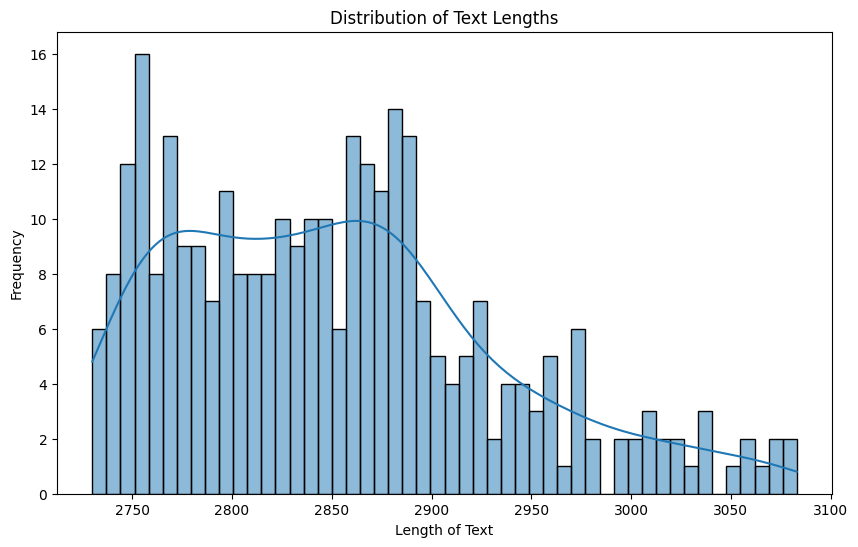

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add a new column for the length of each transcription
df['text_len'] = df['text'].apply(len)

# Plot the distribution of transcription lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['text_len'], bins=50, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Length of Text')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Print basic statistics of transcription lengths
print(df['text_len'].describe())

count     309.000000
mean     2851.818770
std        81.289962
min      2730.000000
25%      2785.000000
50%      2843.000000
75%      2893.000000
max      3083.000000
Name: text_len, dtype: float64


In [ ]:
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Tokenize the transcriptions and remove stopwords
words = df['text'].str.lower().str.split()
words = words.apply(lambda x: [word for word in x if word not in ENGLISH_STOP_WORDS])

# Flatten list and count word frequencies
word_freq = Counter([word for sublist in words for word in sublist])

# Most common words
print(word_freq.most_common(10))


[('disagree', 5188), ('agree', 4521), ('strongly', 2752), ('work', 2163), ('feel', 2163), ('job', 1854), ('good', 1545), ('neutral', 1415), ('work,', 1236), ('satisfied', 927)]


# Load BERT

In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset, random_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# Initialize tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2, hidden_dropout_prob=0.2,
                                    attention_probs_dropout_prob=0.2)


# Create Dataset Class

In [ ]:
# Custom dataset
class MedicalTranscriptDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Split the dataset and create data loaders

In [ ]:
from sklearn.model_selection import train_test_split

# Prepare dataset
labels = pd.factorize(df['Occupational_Stress_Target'])[0]
texts = df['text'].tolist()

# Split train+val into train and val sets
texts_train, texts_val, labels_train, labels_val = train_test_split(
    texts, labels, test_size=0.2, stratify=labels, random_state=42)

# Create custom datasets
train_dataset = MedicalTranscriptDataset(texts_train, labels_train, tokenizer)
val_dataset = MedicalTranscriptDataset(texts_val, labels_val, tokenizer)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)


In [ ]:
print(len(train_dataset))
print(len(val_dataset))
print(len(train_dataset) + len(val_dataset))

In [ ]:
print(len(train_loader))
print(len(val_loader))
print(len(train_loader) + len(val_loader))

# Training settings and hyperparameters

In [ ]:
# Training settings
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
optimizer = AdamW(model.parameters(), lr=0.000001, weight_decay=0.01)
total_steps = len(train_loader) * 200
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=50, num_training_steps=total_steps)


# Training and Evaluation Loops

In [ ]:
# Helper functions for training and evaluation
def train_epoch(model, data_loader, optimizer, device, scheduler):
    model = model.train()
    losses = []
    predictions = []
    true_labels = []
    for d in tqdm(data_loader, desc="Training"):
        input_ids = d['input_ids'].to(device)
        attention_mask = d['attention_mask'].to(device)
        labels = d['labels'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs[0]
        losses.append(loss.item())
        loss.backward()
        preds = torch.argmax(outputs[1], dim=1)
        predictions.extend(preds)
        true_labels.extend(labels)
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()
    predictions = torch.stack(predictions).cpu()
    true_labels = torch.stack(true_labels).cpu()
    return np.mean(losses), classification_report(true_labels, predictions, output_dict=False, digits = 4)


In [ ]:
def eval_model(model, data_loader, device):
    model = model.eval()
    losses = []
    predictions = []
    true_labels = []
    with torch.no_grad():
        for d in tqdm(data_loader, desc="Evaluating"):
            input_ids = d['input_ids'].to(device)
            attention_mask = d['attention_mask'].to(device)
            labels = d['labels'].to(device)
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs[0]
            losses.append(loss.item())
            preds = torch.argmax(outputs[1], dim=1)
            predictions.extend(preds)
            true_labels.extend(labels)
    predictions = torch.stack(predictions).cpu()
    true_labels = torch.stack(true_labels).cpu()
    return np.mean(losses), classification_report(true_labels, predictions, output_dict=False, digits = 4)


# Training

In [ ]:
from sklearn.metrics import classification_report
import re

def extract_accuracy(report):
    lines = report.split('\n')
    for line in lines:
        if 'accuracy' in line:
            match = re.search(r'accuracy\s+(\d+\.\d+)', line)
            if match:
                return float(match.group(1))
    return 0.0

# Early stopping and training process
best_val_acc = 0.0
patience_counter = 0
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(200):
    print(f'Epoch {epoch + 1}/{200}')
    train_loss, train_report = train_epoch(model, train_loader, optimizer, device, scheduler)
    val_loss, val_report = eval_model(model, val_loader, device)

    # Extract accuracies from the classification reports
    train_accuracy = extract_accuracy(train_report)
    val_accuracy = extract_accuracy(val_report)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    print(f'Train loss {train_loss}, Training Classification Report:\n{train_report}')
    print(f'Val loss {val_loss}, Validation Classification Report:\n{val_report}')

    print(f'Train accuracy {train_accuracy}, Val accuracy {val_accuracy}')
    print('-'*100)
    print('-'*100)

    if val_accuracy >= best_val_acc:
        torch.save(model.state_dict(), 'best_model_state.bin')
        best_val_acc = val_accuracy
        patience_counter = 0
    else:
        patience_counter += 1
    if patience_counter == 15:
        print("Early stopping")
        break


In [ ]:
import torch
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Load the best model
model.load_state_dict(torch.load('best_model_state.bin'))
model = model.to(device)

# Evaluate on the validation set
val_loss, val_report = eval_model(model, val_loader, device)
print(f'Validation Classification Report:\n{val_report}')

# Get predictions and true labels
model = model.eval()
predictions = []
true_labels = []
with torch.no_grad():
    for d in tqdm(val_loader, desc="Evaluating"):
        input_ids = d['input_ids'].to(device)
        attention_mask = d['attention_mask'].to(device)
        labels = d['labels'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        preds = torch.argmax(outputs[1], dim=1)
        predictions.extend(preds.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

# Confusion Matrix
cm = confusion_matrix(true_labels, predictions)
sns.set_context("paper", font_scale=1.5)
plt.rcParams['figure.figsize'] = [6, 4]

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# ROC-AUC Curve
fpr, tpr, _ = roc_curve(true_labels, predictions, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'Model (area = {roc_auc:.4f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [ ]:
torch.cuda.empty_cache()

# Load BioBERT

In [ ]:
# Initialize tokenizer and model
tokenizer = BertTokenizer.from_pretrained('dmis-lab/biobert-v1.1')
model = BertForSequenceClassification.from_pretrained('dmis-lab/biobert-v1.1', num_labels=2, hidden_dropout_prob=0.2,
                                    attention_probs_dropout_prob=0.2).to('cuda')

In [ ]:
# Training settings
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
optimizer = AdamW(model.parameters(), lr=1e-5, weight_decay=0.01)
total_steps = len(train_loader) * 200
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=50, num_training_steps=total_steps)


In [ ]:
# Early stopping and training process
best_val_loss = np.inf
patience_counter = 0
train_losses = []
val_losses = []

for epoch in range(200):
    print(f'Epoch {epoch + 1}/{200}')
    train_loss, train_report = train_epoch(model, train_loader, optimizer, device, scheduler)
    val_loss, val_report = eval_model(model, val_loader, device)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print(f'Train loss {train_loss}, Training Classification Report:\n{train_report}')
    print(f'Val loss {val_loss}, Validation Classification Report:\n{val_report}')

    print('-'*100)
    print('-'*100)
    if val_loss <= best_val_loss:
        torch.save(model.state_dict(), 'best_model_state.bin')
        best_val_loss = val_loss
        patience_counter = 0
    else:
        patience_counter += 1
    if patience_counter == 10:
        print("Early stopping")
        break


In [ ]:
torch.cuda.empty_cache()

# Load ClinicalBERT

In [ ]:
# Initialize tokenizer and model
tokenizer = BertTokenizer.from_pretrained('emilyalsentzer/Bio_ClinicalBERT')
model = BertForSequenceClassification.from_pretrained('emilyalsentzer/Bio_ClinicalBERT', num_labels=2, hidden_dropout_prob=0.2,
                                    attention_probs_dropout_prob=0.2).to('cuda')

In [ ]:
# Training settings
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
optimizer = AdamW(model.parameters(), lr=1e-5, weight_decay=0.01)
total_steps = len(train_loader) * 200
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=50, num_training_steps=total_steps)


In [ ]:
# Early stopping and training process
best_val_loss = np.inf
patience_counter = 0
train_losses = []
val_losses = []

for epoch in range(200):
    print(f'Epoch {epoch + 1}/{200}')
    train_loss, train_report = train_epoch(model, train_loader, optimizer, device, scheduler)
    val_loss, val_report = eval_model(model, val_loader, device)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print(f'Train loss {train_loss}, Training Classification Report:\n{train_report}')
    print(f'Val loss {val_loss}, Validation Classification Report:\n{val_report}')

    print('-'*100)
    print('-'*100)
    if val_loss <= best_val_loss:
        torch.save(model.state_dict(), 'best_model_state.bin')
        best_val_loss = val_loss
        patience_counter = 0
    else:
        patience_counter += 1
    if patience_counter == 10:
        print("Early stopping")
        break


In [ ]:
torch.cuda.empty_cache()

# Load DischargeBERT

In [ ]:
# Initialize tokenizer and model
tokenizer = BertTokenizer.from_pretrained('emilyalsentzer/Bio_Discharge_Summary_BERT')
model = BertForSequenceClassification.from_pretrained('emilyalsentzer/Bio_Discharge_Summary_BERT', num_labels=2, hidden_dropout_prob=0.2,
                                    attention_probs_dropout_prob=0.2).to('cuda')

In [ ]:
# Training settings
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
optimizer = AdamW(model.parameters(), lr=1e-5, weight_decay=0.01)
total_steps = len(train_loader) * 200
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=50, num_training_steps=total_steps)


In [ ]:
# Early stopping and training process
best_val_loss = np.inf
patience_counter = 0
train_losses = []
val_losses = []

for epoch in range(200):
    print(f'Epoch {epoch + 1}/{200}')
    train_loss, train_report = train_epoch(model, train_loader, optimizer, device, scheduler)
    val_loss, val_report = eval_model(model, val_loader, device)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print(f'Train loss {train_loss}, Training Classification Report:\n{train_report}')
    print(f'Val loss {val_loss}, Validation Classification Report:\n{val_report}')

    print('-'*100)
    print('-'*100)
    if val_loss <= best_val_loss:
        torch.save(model.state_dict(), 'best_model_state.bin')
        best_val_loss = val_loss
        patience_counter = 0
    else:
        patience_counter += 1
    if patience_counter == 10:
        print("Early stopping")
        break


In [ ]:
torch.cuda.empty_cache()

# Load COReBERT

In [ ]:
# Initialize tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bvanaken/CORe-clinical-outcome-biobert-v1')
model = BertForSequenceClassification.from_pretrained('bvanaken/CORe-clinical-outcome-biobert-v1', num_labels=2, hidden_dropout_prob=0.2,
                                    attention_probs_dropout_prob=0.2).to('cuda')

In [ ]:
# Training settings
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
optimizer = AdamW(model.parameters(), lr=1e-5, weight_decay=0.01)
total_steps = len(train_loader) * 200
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=50, num_training_steps=total_steps)


In [ ]:
# Early stopping and training process
best_val_loss = np.inf
patience_counter = 0
train_losses = []
val_losses = []

for epoch in range(200):
    print(f'Epoch {epoch + 1}/{200}')
    train_loss, train_report = train_epoch(model, train_loader, optimizer, device, scheduler)
    val_loss, val_report = eval_model(model, val_loader, device)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print(f'Train loss {train_loss}, Training Classification Report:\n{train_report}')
    print(f'Val loss {val_loss}, Validation Classification Report:\n{val_report}')

    print('-'*100)
    print('-'*100)
    if val_loss <= best_val_loss:
        torch.save(model.state_dict(), 'best_model_state.bin')
        best_val_loss = val_loss
        patience_counter = 0
    else:
        patience_counter += 1
    if patience_counter == 10:
        print("Early stopping")
        break


In [ ]:
print("BERT: 87.10")
print("BioBERT: 83.87")
print("ClinicalBERT: 82.26")
print("DischargeBERT: 77.42")
print("COReBERT: 82.26")

# Token statistics

In [ ]:
# Tokenize the text and count the number of tokens
df['token_count'] = df['text'].apply(lambda x: len(tokenizer.encode(x, add_special_tokens=True)))

In [ ]:
# Calculate statistics for token counts
stats = df['token_count'].describe()

# Printing the statistics
print("Token Count Statistics:")
print(stats)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of transcription lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['token_count'], bins=50, kde=True)
plt.title('Distribution of Token Counts')
plt.xlabel('Length of Tokens')
plt.ylabel('Frequency')
plt.show()
